In [1]:
#import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [2]:
#import data
df = pd.read_csv("./data/cleaned_data_with2.csv",index_col=0)

df.head()

,Price,city,History,Millage,Ratings,Year,Make,Model,Transmission,Age
0,4965000.0,Abia,foreign,149232.0,4.7,2015.0,Honda,Accord,Automatic,5.0
1,1280000.0,Accra,local,145078.0,4.4,2005.0,Toyota,Corolla,Automatic,15.0
2,1280000.0,Accra,local,91691.0,4.6,2008.0,Toyota,Corolla,Automatic,12.0
3,1567500.0,Lagos,local,234797.0,4.5,2004.0,Toyota,Corolla,Automatic,16.0
4,6065000.0,Lagos,foreign,145678.0,4.8,2013.0,Hyundai,Azera,Automatic,7.0


### Data Preparation

In [3]:
#drop the Year column
df = df.drop(['Year'],axis=1)

In [4]:
df['Price'] = df['Price']/1000000 #reduce the Price values

In [5]:
#split the data
X = df.drop(['Price'], axis=1)
y = df['Price']  #target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
X_train.describe()

,Millage,Ratings,Age
count,1.292000e+04,12920.000000,12920.000000
mean,8.757541e+04,2.361896,10.939241
std,8.433460e+05,0.941091,4.096590
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,2.000000,8.000000
50%,5.000000e+04,2.000000,12.000000
75%,9.028050e+04,2.000000,13.000000
max,9.000000e+07,5.000000,45.000000


In [6]:
#to display results
results = X_test

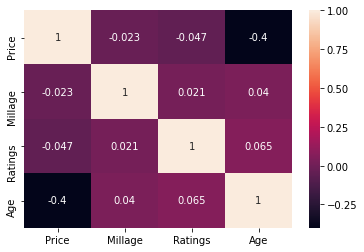

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

norm_cols = ['Millage','Ratings','Age']

# fit scaler on training data
norm = MinMaxScaler().fit(X_train[norm_cols])

# transform training data
X_train.loc[:,norm_cols] = norm.transform(X_train[norm_cols])

# transform testing data
X_test.loc[:,norm_cols] = norm.transform(X_test[norm_cols])

/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
#transform training data
#y_train=(y_train-y_train.mean())/y_train.std()

#y_test = norm_y.transform(y_test)
#y_test=(y_test-y_test.mean())/y_test.std()

In [10]:
X_train.describe()

,Millage,Ratings,Age
count,12920.000000,12920.000000,12920.000000
mean,0.000973,0.472379,0.243094
std,0.009371,0.188218,0.091035
min,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.177778
50%,0.000556,0.400000,0.266667
75%,0.001003,0.400000,0.288889
max,1.000000,1.000000,1.000000


In [11]:
X_test.shape

(4307, 8)

In [12]:
#One Hot encoding for History and Transmission

ohe = ce.OneHotEncoder(cols=['History','Transmission'])  #instantiate the one-hot encoder

X_train = ohe.fit_transform(X_train)  #fit and transform ohe

X_test = ohe.transform(X_test)

In [13]:
# encodings for city, Make and Model

base_encoder = ce.BaseNEncoder(cols=['city','Make','Model'],base=3)

# fit and transform and you will get the encoded data
X_train = base_encoder.fit_transform(X_train)

X_test = base_encoder.transform(X_test)

In [14]:
X_train.shape

(12920, 24)

### Model Development

##### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

lr = LinearRegression() 
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_train_lr = lr.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_lr)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_lr)))

The mean_absolute error is 3.451252750668377
The r2_error is 0.20085759945430426


In [17]:
y_test_lr = lr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_lr)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_lr)))

The mean_absolute error is 3.521671987536398
The r2_error is 0.17012239553716513


##### K-Nearest Neigbours

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [19]:
y_train_knn = knn.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_knn)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_knn)))

The mean_absolute error is 2.1614001181114553
The r2_error is 0.5634881141172599


In [20]:
y_test_knn = knn.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_knn)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_knn)))

The mean_absolute error is 2.740018780183422
The r2_error is 0.3649409311537575


##### Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, max_depth=5, random_state=42,n_jobs=-1,criterion='mse')
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [22]:
y_train_rf = rf.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_rf)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_rf)))

The mean_absolute error is 2.70007597116557
The r2_error is 0.47265296890481157


In [23]:
y_test_rf = rf.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_rf)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_rf)))

The mean_absolute error is 2.8236420652324665
The r2_error is 0.34780804607937443


##### Gradient Boosted Trees

In [24]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(max_depth=5,objective='reg:squarederror',learning_rate=0.1,
                        n_estimators=1000,n_jobs=1) #xgboost
xgbr.fit(X_train,y_train)

/Users/admin/anaconda3/envs/dsr/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(max_depth=5, n_estimators=1000, objective='reg:squarederror')

In [25]:
y_train_xgb = xgbr.predict(X_train)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_train,y_train_xgb)))
print('The r2_error is {}'.format(r2_score(y_train,y_train_xgb)))

The mean_absolute error is 1.5935920319976165
The r2_error is 0.7821866380499181


In [26]:
y_test_xgb = xgbr.predict(X_test)

print('The mean_absolute error is {}'.format(mean_absolute_error(y_test,y_test_xgb)))
print('The r2_error is {}'.format(r2_score(y_test,y_test_xgb)))

The mean_absolute error is 2.5966237165767128
The r2_error is 0.4513171003322549


#### Result Presentation

In [29]:
results.loc[:,'real_price'] = y_test*1000000
results.loc[:,'predicted_price'] = y_test_xgb*1000000

results.head(10)

,city,History,Millage,Ratings,Make,Model,Transmission,Age,real_price,predicted_price
9435,Lagos,foreign,0.000989,0.40,Toyota,Sienna,Automatic,0.333333,2602500.0,1.964743e+06
12164,Lagos,foreign,0.000000,0.40,Toyota,Tacoma,Automatic,0.222222,7165000.0,6.752058e+06
1527,Lagos,foreign,0.000000,0.40,Toyota,Camry,Automatic,0.244444,3062500.0,2.397473e+06
15364,Abuja,local,0.002557,0.60,Toyota,Sienna,Automatic,0.266667,1595000.0,1.992059e+06
3578,Lagos,foreign,0.001100,0.40,Hyundai,Elantra,Automatic,0.266667,2430000.0,2.290483e+06
104,Lagos,foreign,0.001523,0.92,Toyota,Camry,Automatic,0.200000,3350000.0,5.144191e+06
12311,Lagos,foreign,0.000567,0.40,Acura,MDX,Automatic,0.244444,3755000.0,3.093486e+06
8957,Lagos,foreign,0.000000,0.40,Honda,Pilot,Automatic,0.222222,5515000.0,3.438519e+06
12679,Lagos,foreign,0.000000,0.40,Mercedes-Benz,C 350,Automatic,0.222222,0.0,4.608400e+06
4038,Lagos,foreign,0.008540,0.40,Toyota,Avalon,Automatic,0.288889,0.0,2.057085e+06


In [28]:
#next make range predictions